<a href="https://colab.research.google.com/github/KJ22222/ESSA/blob/main/9_19_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4강 모델 훈련

- 직접 계산 할 수 있는 공식을 사용하여 훈련 세트에 잘 맞는 모델 파라미터 해석적으로 구하기
- 경사하강법으로 비용함수를 훈련 세트에 대해 최소화 시키기

##4.1 선형 회귀
- 훈련:모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
- 선형회귀의 경우 MSE를 최소화하는 것을 찾는 것
- 선형 회귀 MSE 비용 함수
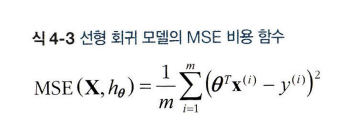


###4.1.1 정규 방정식
- 비용함수를 최소화 하는 세타를 찾기 위한 해석적인 방법

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

정규방정식으로 세타헷 계산
- inv()함수를 사용해 역행렬을 계산하고 dot() 메서드를 사용해 행렬 곱셈

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.13618721],
       [2.98474531]])

세타헷을 사용해 예측하기

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1 추가
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 4.13618721],
       [10.10567784]])

모델 예측 그래프로 나타내기

In [6]:
import matplotlib.pyplot as plt

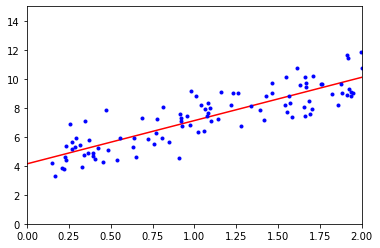

In [7]:
plt.plot(X_new, y_predict, "r-") # 빨강 직선. label은 범례 지정용
plt.plot(X, y, "b.")             # 파란 점: 훈련 세트 산점도                     
plt.axis([0, 2, 0, 15])                                            # x축, y축 구간 지정
plt.show()

사이킷선에서 선형회귀를 수행

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13618721]), array([[2.98474531]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.13618721],
       [10.10567784]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.13618721],
       [2.98474531]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.13618721],
       [2.98474531]])

###4.1.2 계산의 복잡도

역행렬을 계산하는 계산 복잡도는 일반적으로 크면 특성 수가 2배로 늘어나면 계산 시간이 대략 4배가 된다.

##4.2 경사 하강법

- 경사하강법으로 비용함수를 훈련 세트에 대해 최소화 시키기
- 파라미터 벡터 세타에 대해 비용 함수의 현재 그레이디언트를 계산하고 이것이 감소하는 방향으로 진행
- 가장 중요한 파라미터는 학습률로 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 해야하므로 시간이 오래 걸림

작을때

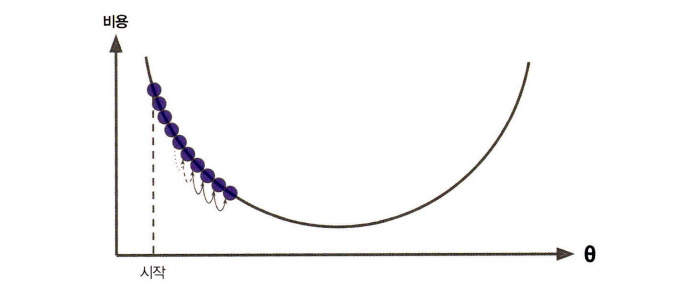

클때

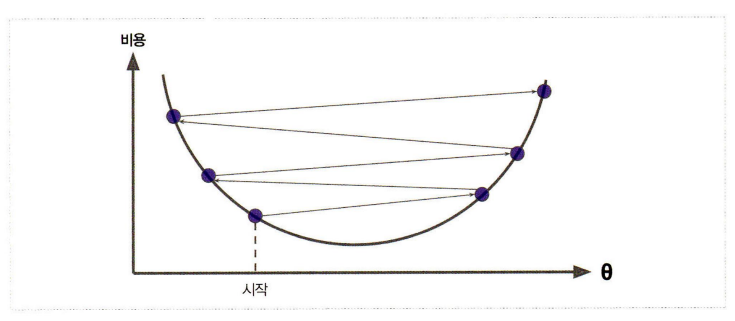

- 선형 회귀를 위한 mse 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수




###4.2.1 배치 경사 하강법

In [12]:
eta = 0.1                     # 학습률
n_iterations = 1000           # 1000번 파라미터 조정
m = 100                       # 샘플 수

theta = np.random.randn(2,1)  # 파라미터 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 비용 함수 그레이디언트
    theta = theta - eta * gradients                   # 파라미터 업데이트

In [13]:
theta

array([[4.13618721],
       [2.98474531]])

정규방정식으로 찾은 것과 정확히 일치

학습률을 바꿔보면서 그래프 그리기

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")    # 훈련 세트 산점도
    
    n_iterations = 1000     # 1000번 반복 훈련
    for iteration in range(n_iterations):
        
        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:                         
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        # 조정되는 파라미터를 모두 리스트에 저장 (theta_path=None 옵션이 아닌 경우)
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

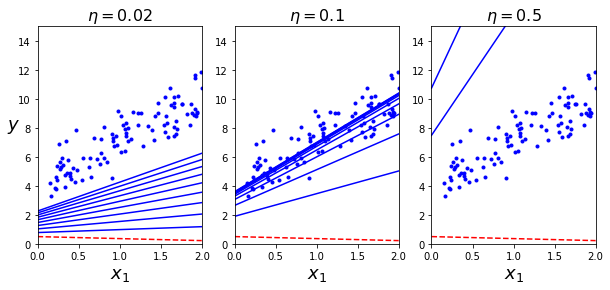

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

plt.figure(figsize=(10,4))    # 도표 크기 지정

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.1
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

###4.2.2 확률적 경사 하강법

In [16]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)

- 에포크-n_epochs=50: 총 50번의 에포크 기간동안 훈련 진행
- t0 과 t1: 학습 스케줄을 위한 하이퍼파라미터 역할 수행

In [17]:
n_epochs = 50   # 에포크 수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

모델이 수렴값 근처에서 진동함

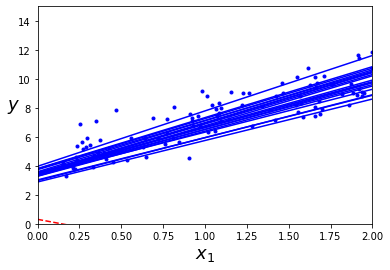

In [19]:
theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    
    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):
        
        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
            
        # 파라미터 업데이트
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show() 

50번의 에포크로도 상당히 좋은 파라미터를 찾음

In [20]:
theta

array([[4.09762361],
       [2.94980686]])

#- 사이킷런의 SGDRegressor 모델
-  확률적 경사 하강법을 사용하며 따라서 매우 빠르게 학습

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11637475]), array([3.02780375]))

###4.2.3 미니배치 경사 하강법
<파라미터>
- theta_path_mgd 변수: 미니배치 경사 하강법에서 조정되는 파라미터를 순처적으로 저장하는 용도의 리스트. 아래에서 세 종류의 경사 하강법을 비교하는 그림에서 활용
- n_iterations = 50: 에포크 수 50
- minibatch_size = 20: 배치 크기 20



In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [24]:
t = 0

for epoch in range(n_iterations):
    
    # 에포크가 바뀔 때마다 훈련 데이터 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 20개 데이터 샘플을 훈련할 때마다 파라미터 업데이트
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)        # 학습 스케줄 활용
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[4.28029836],
       [3.16823375]])

배치/확률적/미니배치 경사 하강법 파라미터 학습과정 비교

In [26]:

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

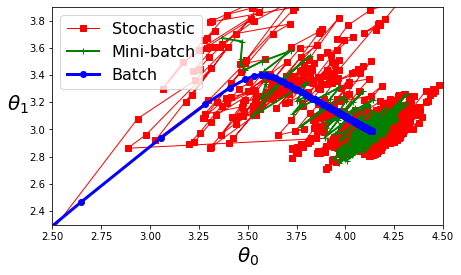

In [28]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

##4.3 다항 회귀

In [29]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

훈련 세트 산점도

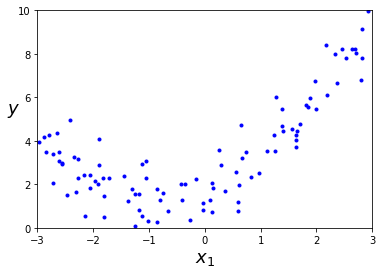

In [30]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

PolynomialFeatures: 다항 회귀 변환기

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

- degree=2: 2차 다항식을 활용하라고 지정하기
- include_bias=False: 절편(편향)을 변환된 어레이에 추가할지 여부 지정


In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [33]:
X[0]

array([-0.75275929])

In [34]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [36]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

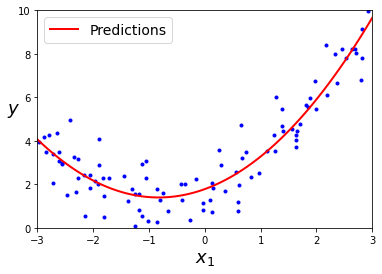

In [37]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)     # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)       # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)               # 예측하기

plt.plot(X, y, "b.")                                            # 기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 예값 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

##4.4 학습 곡선
- 초록 실선 그래프: 300차 다항 회귀 모델
- 파랑 파선 그래프: 2차 다항 회귀 모델
- 빨강 철망 그래프: 1차 선형 회귀 모델

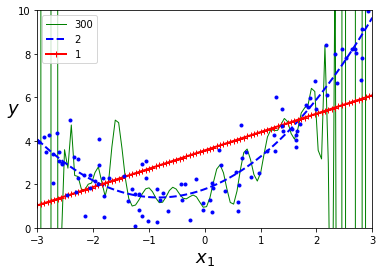

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 세 개의 다항 회귀 모델 지정: 차례 대로 300차 다항 회귀, 2차 다항 회귀, 1차 선형 회귀 모델의 예측값 그래프 그리기
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):   
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)  # 다항 특성 변환기
    std_scaler = StandardScaler()                                             # 표준화 축척 조정
    lin_reg = LinearRegression()                                              # 선형 회귀 모델
    
    polynomial_regression = Pipeline([                         # 파이프라인: 전처리 + 선형 회귀 모델
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)                                            # 훈련
    y_newbig = polynomial_regression.predict(X_new)                            # 예측
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)       # 그래프 그리기

plt.plot(X, y, "b.", linewidth=3)                                              # 원 데이터 산점도
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

학습 곡선
- 훈련 세트와 검증 세트에 대한 모델 성능의 변화를 추적하는 곡선
- 모델 성능의 변화는 훈련 세트의 크기를 1부터 시작해서 최대값까지 바꾸면서 훈련된 모델의 성능을 훈련 세트와 검증 세트 각각에 대해 측정하는 방식으로 확인함

In [40]:
from sklearn.metrics import mean_squared_error           # MSE 수동 계산
from sklearn.model_selection import train_test_split     # 무작위 샘플링

def plot_learning_curves(model, X, y):
    # 8:2 로 분류
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []                    # MSE 추적 장치

    for m in range(1, len(X_train)):                     # m 개의 훈련 샘플을 대상으로 훈련
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # MSE 기록
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)    

과소 적합 모델의 학습 곡선 특징

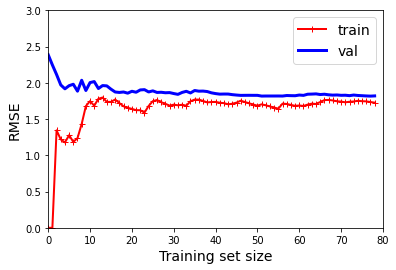

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()      

과대 적합 모델의 학습 곡선 특징

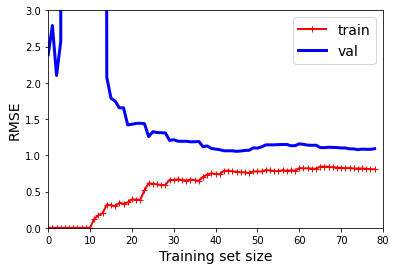

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show() 

##4.5 규제를 사용하는 선형 모델

- 릿지 회귀
- 라쏘 회귀
- 엘라스틱넷

###4.5.1 릿지 회귀
- X: 훈련 세트, 크기는 20.
- X_new: 100개의 검증용 데이터.

In [44]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5     # 1차 선형회귀 모델을 따로도록 함. 단, 잡음 추가됨.
X_new = np.linspace(0, 3, 100).reshape(100, 1)    # 0~3 구간에서 균등하게 100개의 검증 데이터

릿지 회귀의 비용 함수

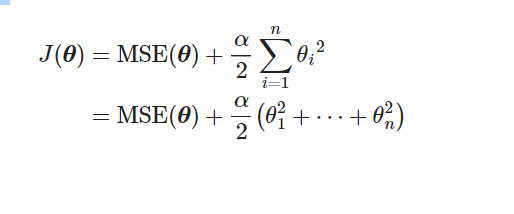

- solver=cholesky: 원래는 경사하강법을 계산하는 옵티마이저 지정. 하지만 cholesky를 지정하면 정규방정식을 이용하여 최적의 파라미터를 계산
- alpha=1: 규제 강도를 나타냄. 값이 클 수록 규제가 세짐. 이유는 비용 함숫값을 줄이기 위해 
 값들이 작아지도록 강요되기 때문

In [45]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [46]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

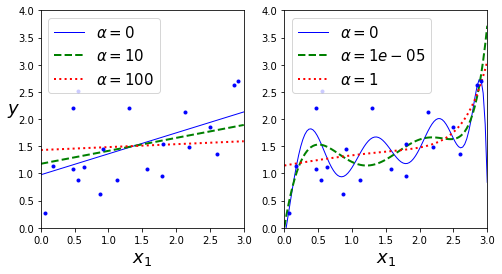

In [48]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),           # 표준화 축척 조정
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

###4.5.2 라쏘 회귀

라쏘 회귀의 비용 함수
-
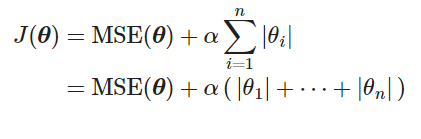

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


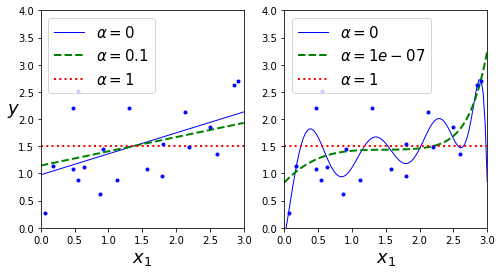

In [50]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [51]:
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.45526648])

###4.5.3 엘라스틱 넷

엘라스틱넷 비용 함수

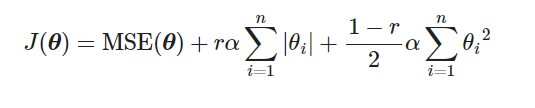

In [52]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

- alpha=0.1: 규제 강도
- l1_ratio=0.5: 혼합 비율 r

In [53]:
sgd_reg = SGDRegressor(penalty="elasticnet", alpha=0.1, l1_ratio=0.5, max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.45913103])

###4.5.4 조기 종료

In [55]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# 5:5로 훈련/검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5)

In [56]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

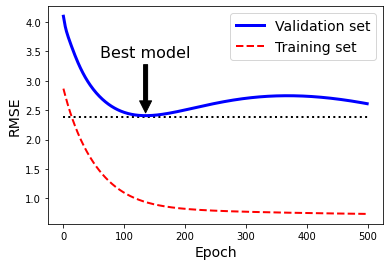

In [57]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500

train_errors, val_errors = [], []                    # 훈련/검증 모델 성능 기록 장치

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)        # warm_start=True 이기에 학습결과를 이어감.
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))  # 훈련/검증모델 성능 기록
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)                  # 최고 성능의 모델 기억해두기
best_val_rmse = np.sqrt(val_errors[best_epoch])

# 아래부터는 그래프 그리는 코드임.

plt.annotate('Best model',                          # 도표에 문장 넣는 기능. 내용과 위치를 정확히 지정함.
             xy=(best_epoch, best_val_rmse),        # 색상, 폰트 크기 등등을 일일이 지정함.
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 검정 실선을 잘 보여주기 위해서임.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)  # 수평 검정 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")    # 파랑 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")   # 빵강 파선

# 기타 추가 정보
plt.legend(loc="upper right", fontsize=14)  # 범례
plt.xlabel("Epoch", fontsize=14)            # 축 정보
plt.ylabel("RMSE", fontsize=14)
plt.show()

- penalty=None: 규제 사용하지 않음.
- learning_rate=constant: 학습률을 일정하게 유지. 즉, 학습 스케줄 사용하지 않음.
- warm_start=True: 에포크마다 경사 하강법을 적용할 때 선형 회귀 모델을 초기화 하지 않고 이전 에포크에서 학습한 내용을 이어받아서 학습한다는 의미임.

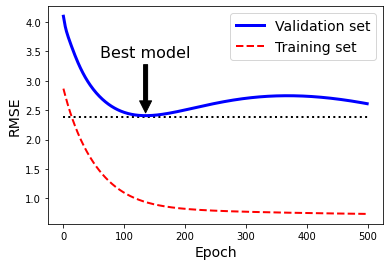

In [58]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500

train_errors, val_errors = [], []                    # 훈련/검증 모델 성능 기록 장치

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)        # warm_start=True 이기에 학습결과를 이어감.
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))  # 훈련/검증모델 성능 기록
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)                  # 최고 성능의 모델 기억해두기
best_val_rmse = np.sqrt(val_errors[best_epoch])

# 아래부터는 그래프 그리는 코드임.

plt.annotate('Best model',                          # 도표에 문장 넣는 기능. 내용과 위치를 정확히 지정함.
             xy=(best_epoch, best_val_rmse),        # 색상, 폰트 크기 등등을 일일이 지정함.
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 검정 실선을 잘 보여주기 위해서임.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)  # 수평 검정 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")    # 파랑 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")   # 빵강 파선

# 기타 추가 정보
plt.legend(loc="upper right", fontsize=14)  # 범례
plt.xlabel("Epoch", fontsize=14)            # 축 정보
plt.ylabel("RMSE", fontsize=14)       
plt.show()

##4.6 로지스틱 회귀

###4.6.1 확률 추정

시그모이드 함수의 그래프

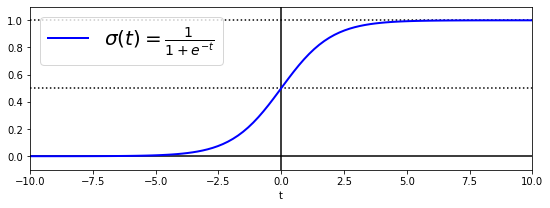

In [59]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

###4.6.3 결정 경계

In [60]:
from sklearn import datasets
iris = datasets.load_iris()

In [61]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- 'data' 키에 해당하는 값은 (150, 4) 모양의 넘파이 어레
- 150: 150개의 붓꽃 샘플
- 4: 네 개의 특성. 차례대로 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비

In [63]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [64]:
iris.target[:5]

array([0, 0, 0, 0, 0])

처음 5개의 샘플은 세토사 품종

In [65]:
iris.target[50:55]

array([1, 1, 1, 1, 1])

50번 인덱스부터는 버시컬러 품종

In [67]:
iris.target[100:105]

array([2, 2, 2, 2, 2])

100번 인덱스부터는 버지니카 품종

In [68]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========